# 第三章　 暖冷房負荷と外皮性能 / Chapter 3 Heating and cooling load and envelope performance

## 第二節　外皮性能 / Section 3  Envelope performance

## 試算例

### 初期条件

In [13]:
def get_default_ENV():
    
    # 基本情報
    house_base = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34}

    # 外皮
    house_ENV = {"A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8, 
                 'method': '当該住宅の外皮面積の合計を用いて評価する', 'tatekata': '戸建住宅'}
    
    return house_base, house_ENV

### 計算

In [14]:
def calc_results_insulation_performance(house_base, house_ENV):

    from pyhees.section3_2 import calc_insulation_performance
    from pyhees.section3_1 import get_Q

    house_ENV['A_A'] = house_base['A_A']
    house_ENV['region'] = house_base['region']

    # 外皮の断熱性能の計算
    if house_ENV is not None:
        U_A, _, eta_A_H, eta_A_C, Q_dash, mu_H, mu_C, _ = calc_insulation_performance(**house_ENV)
        Q = get_Q(Q_dash) # 熱損失係数
    else:
        Q_dash = None
        mu_H, mu_C = None, None

    print(f'U_A={U_A}, eta_A_H={eta_A_H}, eta_A_C={eta_A_C}')
    print(f'Q={Q}, mu_H={mu_H}, mu_C={mu_C}')

    return U_A, eta_A_H, eta_A_C, Q, mu_H, mu_C

### 計算条件1

- 初期条件での計算

In [15]:
house_base, house_ENV = get_default_ENV()
resENV01 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=2.647962191872085, mu_H=0.11011767155229846, mu_C=0.07170453031312457


### 計算条件2

- UA値0.56、ηAH値2.5、ηAC値2に変更

In [16]:
house_base, house_ENV = get_default_ENV()
house_ENV['U_A'] = 0.56
house_ENV['eta_A_H'] = 2.5
house_ENV['eta_A_C'] = 2
resENV02 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.56, eta_A_H=2.5, eta_A_C=2
Q=1.8540906062624918, mu_H=0.0640219020652898, mu_C=0.05121752165223185


### 計算条件3

- 当該住戸の外皮面積を用いず外皮性能を評価する（別途計算）
- 住戸の種類：床断熱住戸
- 浴室の断熱構造：床断熱

In [17]:
house_base, house_ENV = get_default_ENV()
house_ENV['method'] = '簡易的に求めた外皮面積の合計を用いて評価する'
house_ENV['house_insulation_type'] = '床断熱住戸'  
house_ENV['U_spec'] = {'floor_bath_insulation': '床断熱'} 
resENV03 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=2.957113333333333, mu_H=0.12539755555555554, mu_C=0.0816542222222222


### 計算条件4

- 当該住戸の外皮面積を用いず外皮性能を評価する（別途計算）
- 住戸の種類：床断熱住戸
- 浴室の断熱構造：基礎断熱

In [18]:
house_base, house_ENV = get_default_ENV()
house_ENV['method'] = '簡易的に求めた外皮面積の合計を用いて評価する'
house_ENV['house_insulation_type'] = '床断熱住戸' 
house_ENV['U_spec'] = {'floor_bath_insulation': '基礎断熱'} 
resENV04 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=2.9923, mu_H=0.12713666666666668, mu_C=0.08278666666666666


### 計算条件5

- 当該住戸の外皮面積を用いず外皮性能を評価する（別途計算）
- 住戸の種類：床断熱住戸
- 浴室の断熱構造：浴室の床及び基礎が外気等に面していない

In [19]:
house_base, house_ENV = get_default_ENV()
house_ENV['method'] = '簡易的に求めた外皮面積の合計を用いて評価する'
house_ENV['house_insulation_type'] = '床断熱住戸' 
house_ENV['U_spec'] = {'floor_bath_insulation': '浴室の床及び基礎が外気等に面していない'} 
resENV05 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=2.957113333333333, mu_H=0.12539755555555554, mu_C=0.0816542222222222


### 計算条件6

- 当該住戸の外皮面積を用いず外皮性能を評価する（別途計算）
- 住戸の種類：基礎断熱住戸

In [20]:
house_base, house_ENV = get_default_ENV()
house_ENV['method'] = '簡易的に求めた外皮面積の合計を用いて評価する'
house_ENV['house_insulation_type'] = '基礎断熱住戸'
house_ENV['U_spec'] = {'floor_bath_insulation': None} 
resENV06 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=3.0850033333333333, mu_H=0.13171855555555553, mu_C=0.0857702222222222


### 計算条件7

- 当該住戸の外皮面積を用いず外皮性能を評価する（ここで計算）
- 構造の種別：木造
- 住戸の種類：床断熱住戸
- 浴室の断熱構造：床断熱

In [21]:
house_base, house_ENV = get_default_ENV()
house_ENV = {'method': '当該住戸の外皮の部位の面積等を用いて外皮性能を評価する方法', 'tatekata': '戸建住宅',
             'house_structure_type': '木造', 'insulation_structure': '床断熱住戸の場合',
             'U_spec': {'floor_bath_insulation': '床断熱', 'U_roof': 0.240, 'U_wall': 0.530, 'U_door': 2.330,
                        'U_window': 3.490, 'U_floor_bath': 0.480, 'H_floor_bath': 0.7, 'U_floor_other': 0.480,
                         'H_floor_other': 0.7, 'U_base_etrc': 0.480, 'Psi_prm_etrc': 1.800},
             'eta_d_H': 0.510, 'eta_d_C': 0.510}
resENV07 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.81, eta_A_H=3.1, eta_A_C=2.9
Q=2.7821399999999996, mu_H=0.09040288888888888, mu_C=0.08457044444444442


### 計算条件8

- 当該住戸の外皮面積を用いず外皮性能を評価する（ここで計算）
- 構造の種別：鉄筋コンクリート造
- 住戸の種類：基礎断熱住戸

In [22]:
house_base, house_ENV = get_default_ENV()
house_ENV = {'method': '当該住戸の外皮の部位の面積等を用いて外皮性能を評価する方法', 'tatekata': '戸建住宅',
             'house_structure_type': '鉄筋コンクリート造', 'insulation_structure': '基礎断熱住戸の場合',
             'U_spec': {'U_roof': 0.240, 'U_wall': 0.530, 'U_door': 2.330,'U_window': 3.490,
                        'U_base_etrc': 0.480, 'U_base_other': 0.480, 'Psi_prm_etrc': 1.800,
                        'Psi_prm_other': 1.800, 'Psi_HB_roof': 3.050, 'Psi_HB_wall': 3.050, 
                        'Psi_HB_floor': 3.050, 'Psi_HB_roof_wall': 2.600, 'Psi_HB_wall_wall': 2.600,
                        'Psi_HB_wall_floor': 2.600},
             'eta_d_H': 0.510, 'eta_d_C': 0.510}
resENV08 = calc_results_insulation_performance(house_base, house_ENV)

U_A=2.58, eta_A_H=6.5, eta_A_C=6.0
Q=8.323113333333334, mu_H=0.19910944444444445, mu_C=0.1837933333333333


### 計算条件9

- 当該住戸の外皮面積を用いず外皮性能を評価する（ここで計算）
- 構造の種別：鉄骨造
- 住戸の種類：床断熱住戸と基礎断熱住戸の併用
- 浴室の断熱構造：基礎断熱

In [23]:
house_base, house_ENV = get_default_ENV()
house_ENV = {'method': '当該住戸の外皮の部位の面積等を用いて外皮性能を評価する方法', 'tatekata': '戸建住宅',
             'house_structure_type': '鉄骨造', 'insulation_structure': '玄関等及び浴室を除いた部分の外皮が床と土間床等の外周部の基礎のいずれにも該当する場合',
             'U_spec': {'floor_bath_insulation': '基礎断熱', 'U_roof': 0.240, 'U_wall': 0.530, 'U_door': 2.330,
                        'U_window': 3.490, 'U_floor_other': 0.480, 'H_floor_other': 0.7, 'U_base_etrc': 0.480, 
                        'U_base_bath': 0.480, 'U_base_other': 0.480, 'Psi_prm_etrc': 1.800, 'Psi_prm_bath': 1.800,
                        'Psi_prm_other': 1.800, 'Psi_HB_roof': 3.050, 'Psi_HB_wall': 3.050, 'Psi_HB_floor': 3.050,
                        'Psi_HB_roof_wall': 2.600, 'Psi_HB_wall_wall': 2.600, 'Psi_HB_wall_floor': 2.600},
             'eta_d_H': 0.510, 'eta_d_C': 0.510}

resENV09 = calc_results_insulation_performance(house_base, house_ENV)

U_A=2.74, eta_A_H=6.7, eta_A_C=6.2
Q=8.521266666666667, mu_H=0.1980966666666667, mu_C=0.18331333333333336


### 計算条件10

- 当該住戸の外皮面積を用いず外皮性能を評価する（ここで計算）
- 構造の種別：鉄骨造
- 住戸の種類：床断熱住戸と基礎断熱住戸の併用
- 浴室の断熱構造：浴室の床及び基礎が外気等に面していない

In [24]:
house_base, house_ENV = get_default_ENV()
house_ENV = {'method': '当該住戸の外皮の部位の面積等を用いて外皮性能を評価する方法', 'tatekata': '戸建住宅',
             'house_structure_type': '鉄骨造', 'insulation_structure': '玄関等及び浴室を除いた部分の外皮が床と土間床等の外周部の基礎のいずれにも該当する場合',
             'U_spec': {'floor_bath_insulation': '浴室の床及び基礎が外気等に面していない',
                        'U_roof': 0.240, 'U_wall': 0.530, 'U_door': 2.330, 'U_window': 3.490,
                        'U_floor_other': 0.480, 'H_floor_other': 0.7, 'U_base_etrc': 0.480, 
                        'U_base_other': 0.480, 'Psi_prm_etrc': 1.800, 'Psi_prm_other': 1.800,
                        'Psi_HB_roof': 3.050, 'Psi_HB_wall': 3.050, 'Psi_HB_floor': 3.050,
                        'Psi_HB_roof_wall': 2.600, 'Psi_HB_wall_wall': 2.600, 'Psi_HB_wall_floor': 2.600},
             'eta_d_H': 0.510, 'eta_d_C': 0.510}

resENV10 = calc_results_insulation_performance(house_base, house_ENV)


U_A=2.73, eta_A_H=6.8, eta_A_C=6.3
Q=8.381286666666666, mu_H=0.1983031111111111, mu_C=0.18372199999999997


## 試算例の比較

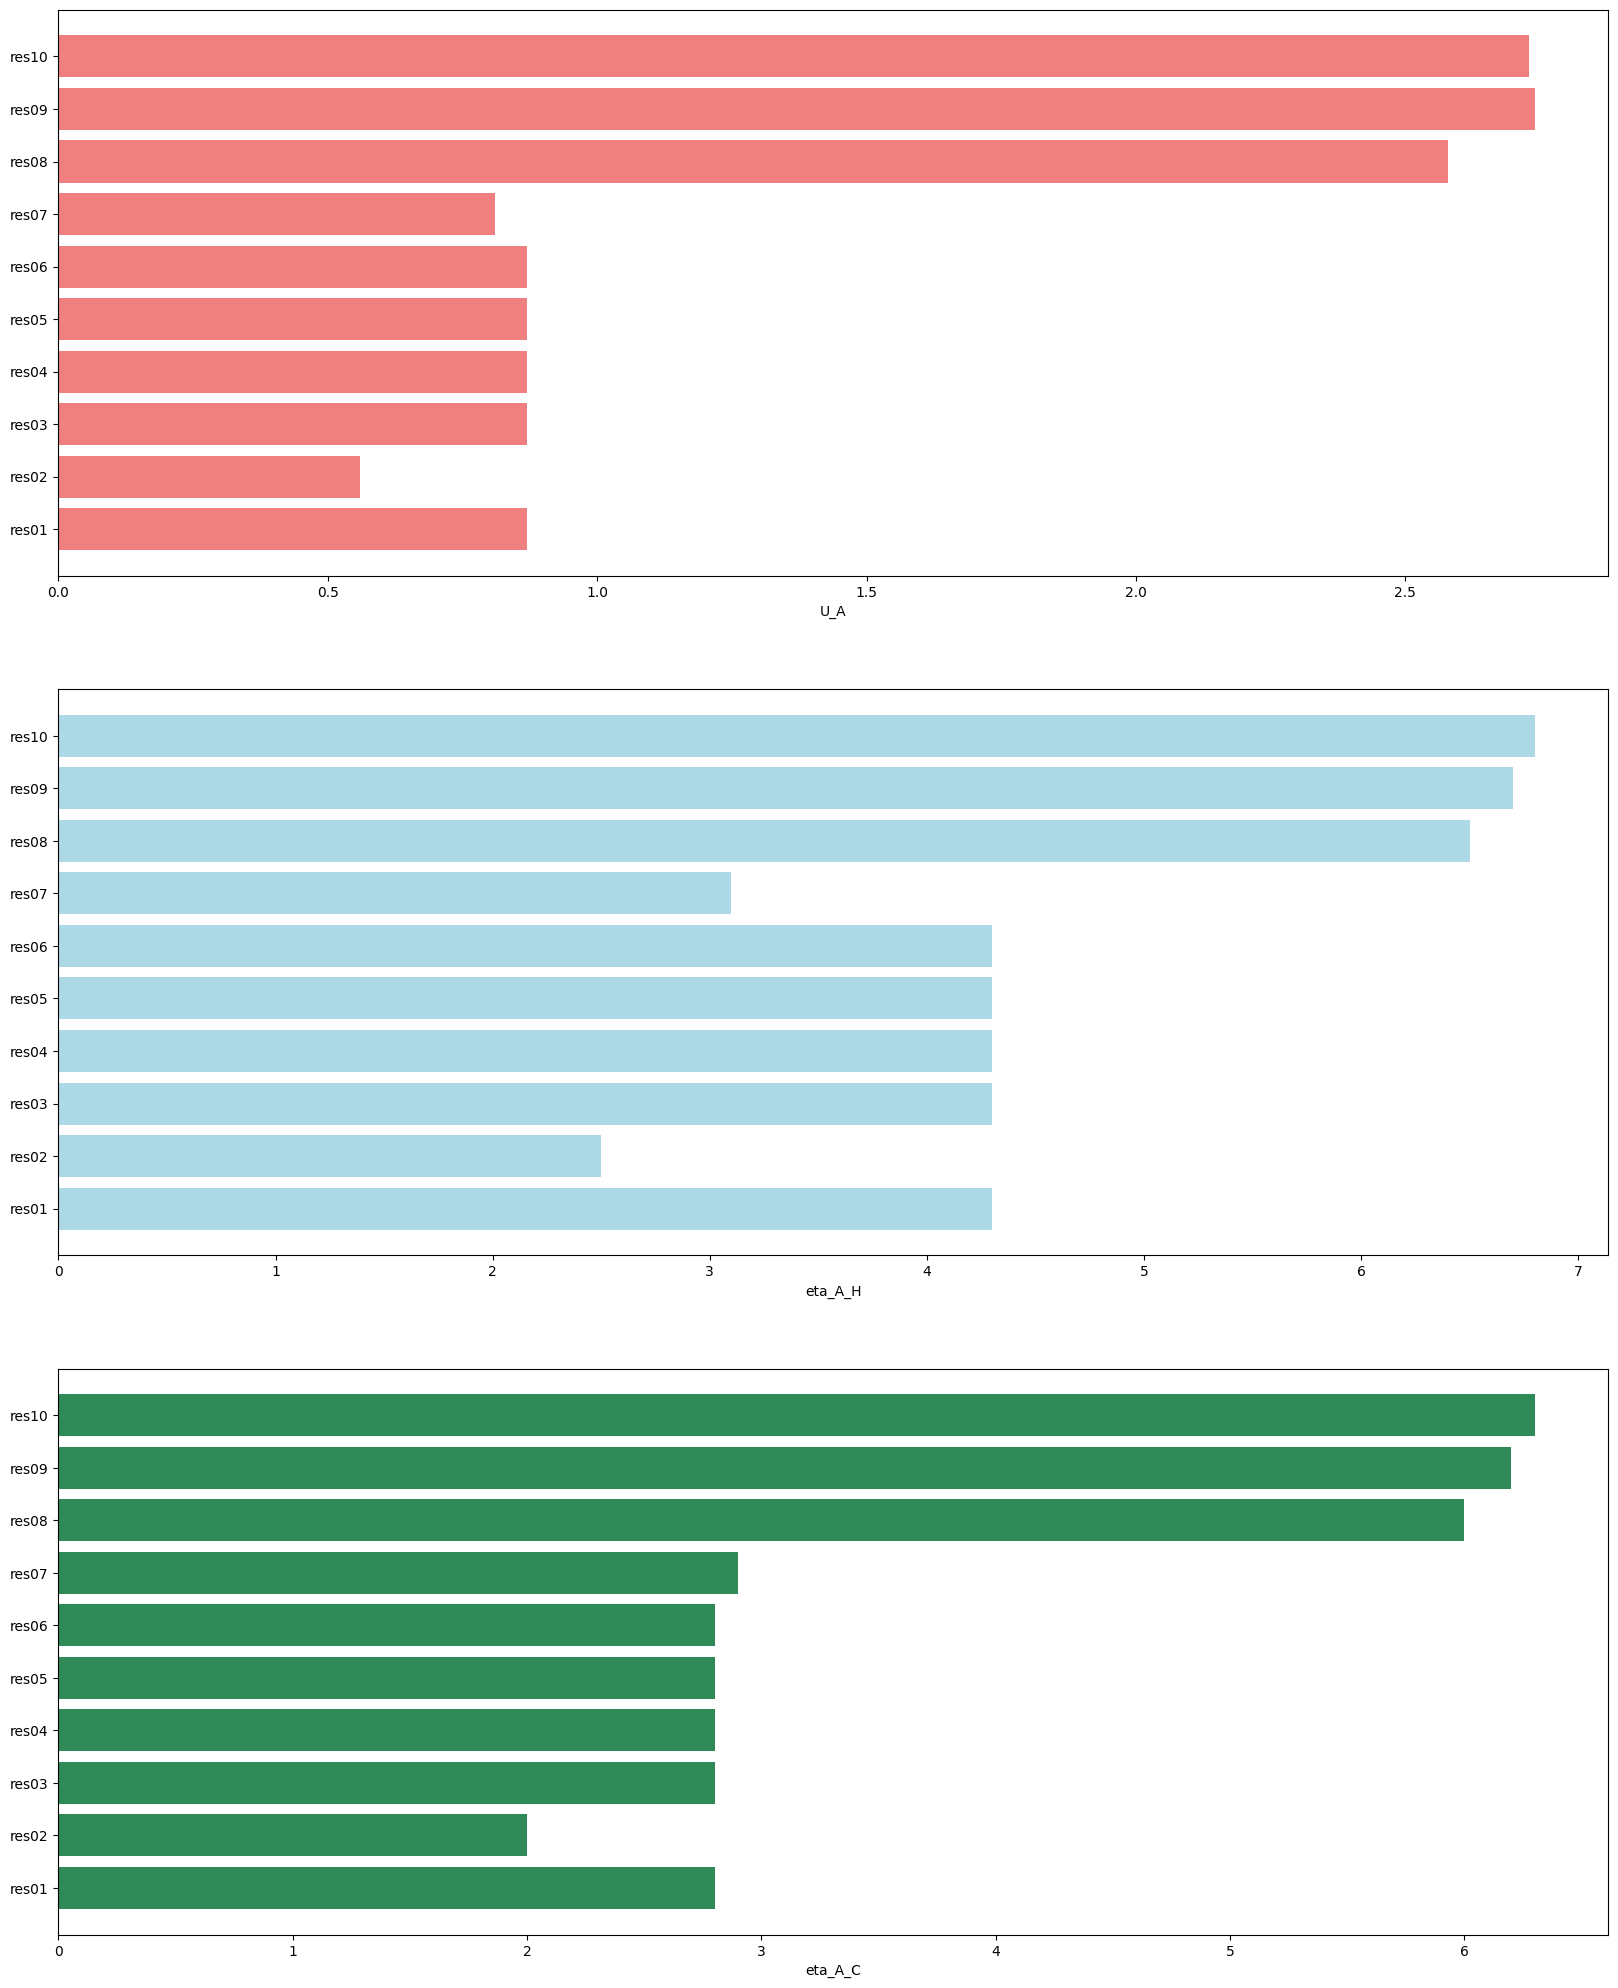

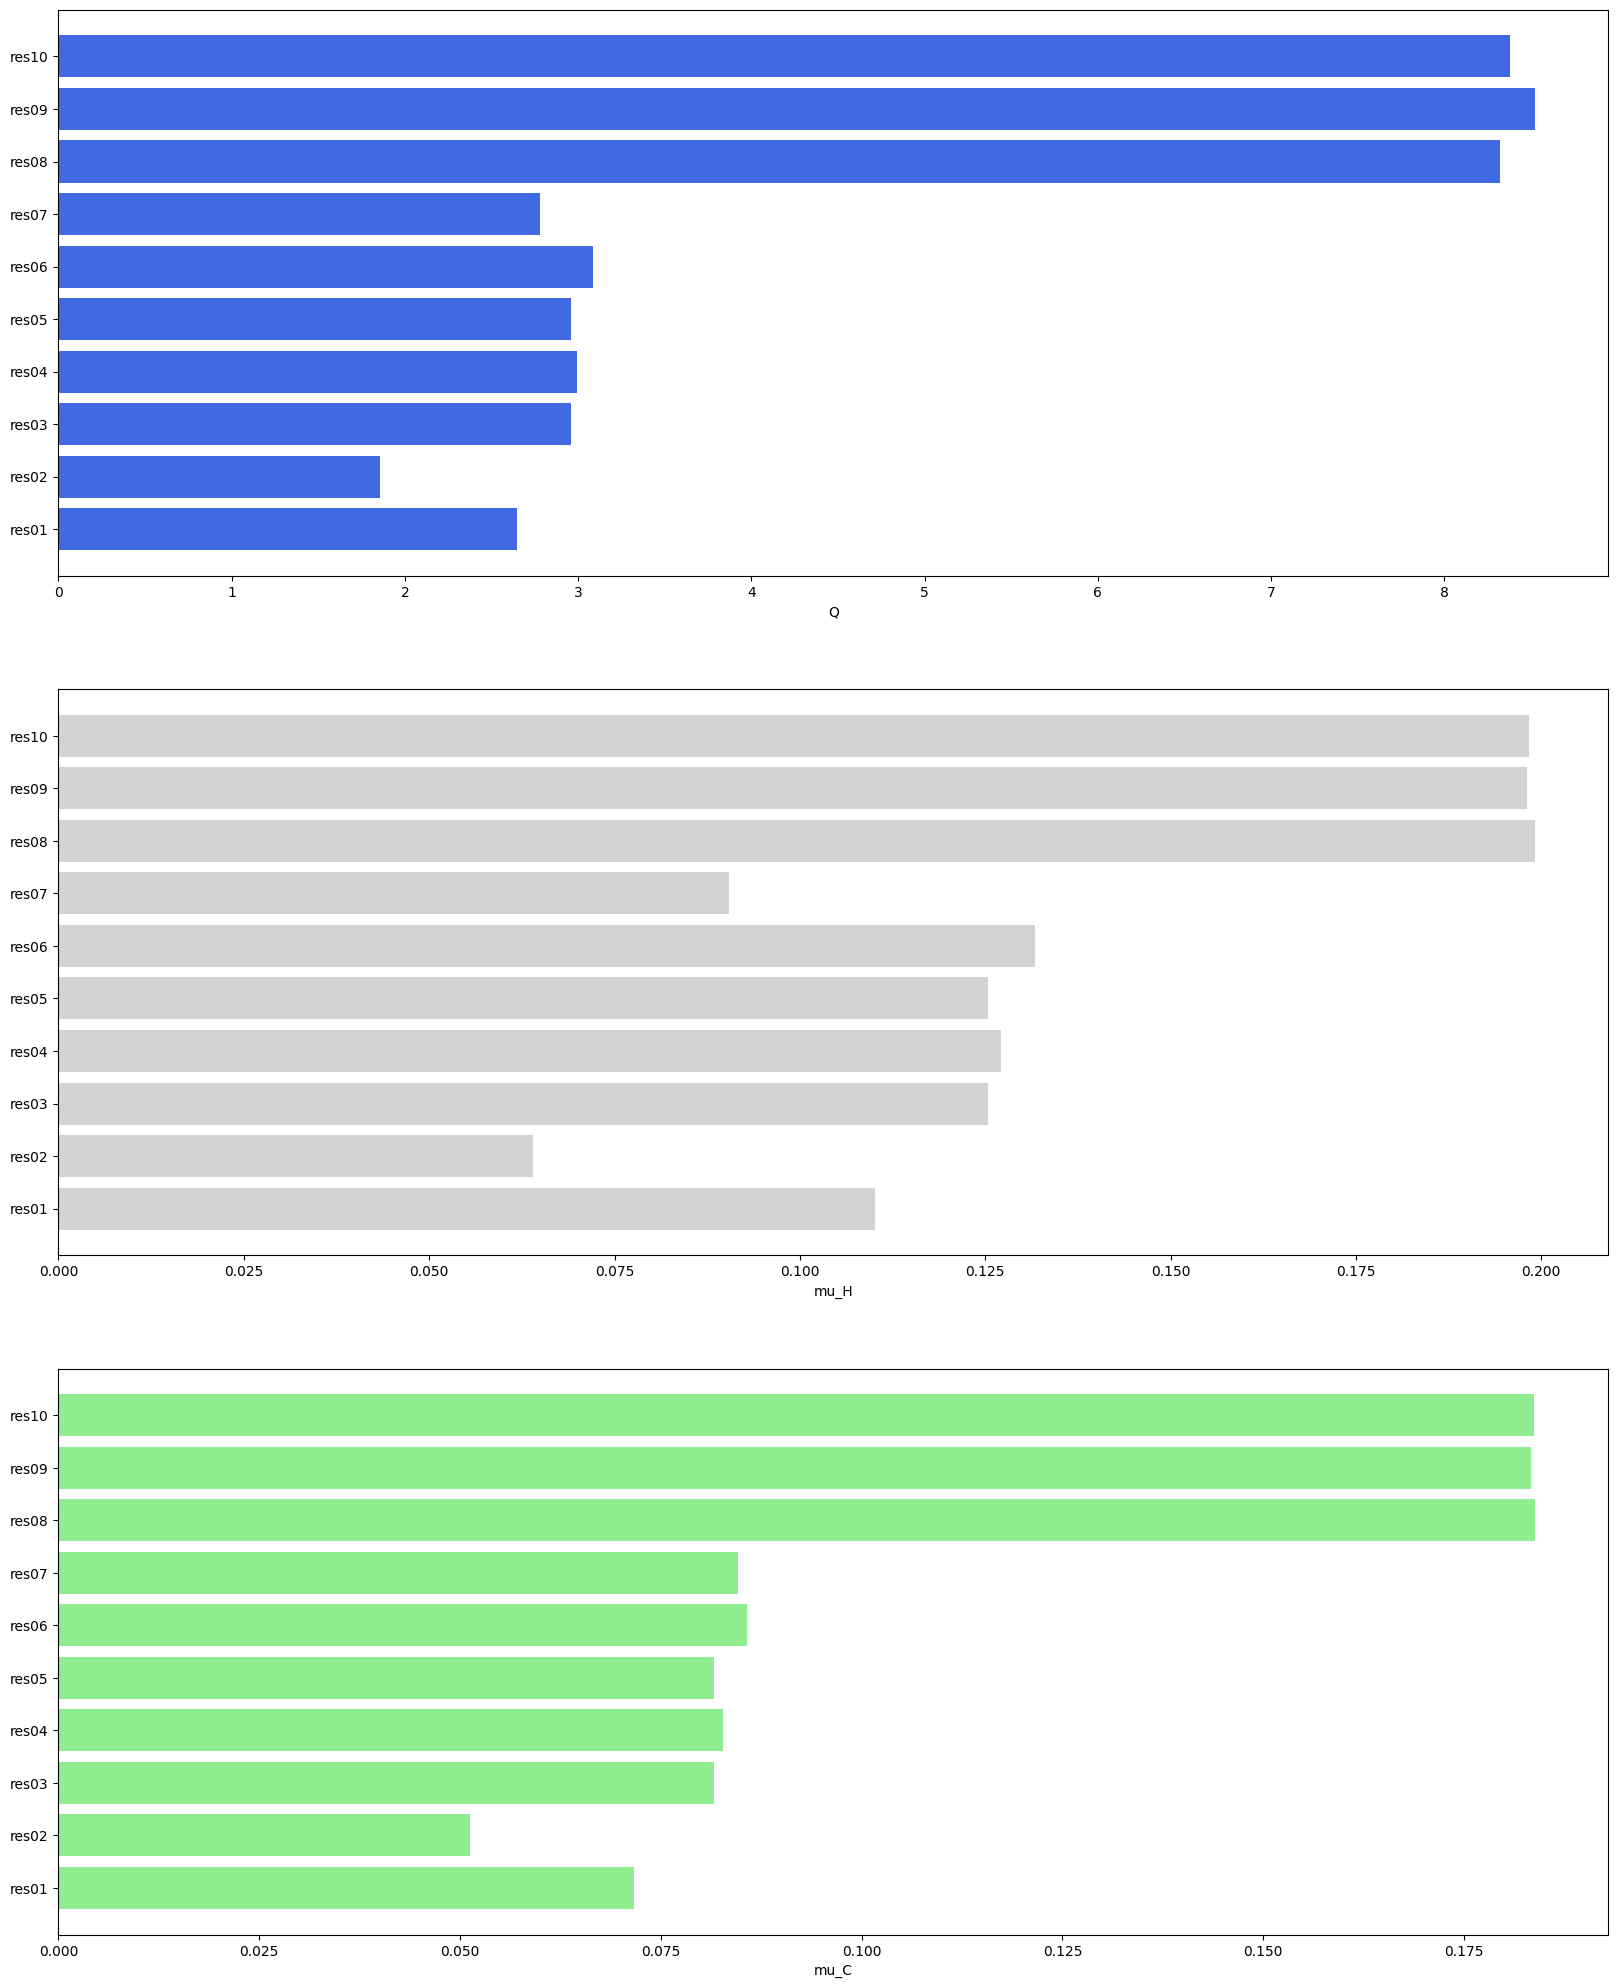

In [25]:
import matplotlib.pyplot as plt

param_names = ["U_A", "eta_A_H", "eta_A_C", "Q", "mu_H", "mu_C"]
grh_colors = ['lightcoral', 'lightblue', 'seagreen', 'royalblue', 'lightgray', 'lightgreen']

# U_A, eta_A_H, eta_A_C
fig = plt.figure(figsize=(20,25))
for i in range(0, 3):
    dat = {"res01": resENV01[i], "res02": resENV02[i], "res03": resENV03[i], "res04": resENV04[i], "res05": resENV05[i], 
           "res06": resENV06[i], "res07": resENV07[i], "res08": resENV08[i], "res09": resENV09[i], "res10": resENV10[i]}

    x = list(dat.keys())
    y = list(dat.values())

    grh = fig.add_subplot(int(f"31{i+1}"))
    grh.barh(x,y, color = grh_colors[i])
    grh.set_xlabel(param_names[i])


# Q, mu_H, mu_C
fig = plt.figure(figsize=(20,25))
for i in range(0, 3):
    dat2 = {"res01": resENV01[i+3], "res02": resENV02[i+3], "res03": resENV03[i+3], "res04": resENV04[i+3], "res05": resENV05[i+3], 
           "res06": resENV06[i+3], "res07": resENV07[i+3], "res08": resENV08[i+3], "res09": resENV09[i+3], "res10": resENV10[i+3]}

    x = list(dat2.keys())
    y = list(dat2.values())

    grh = fig.add_subplot(int(f"31{i+1}"))
    grh.barh(x,y, color = grh_colors[i+3])
    grh.set_xlabel(param_names[i+3])

plt.show()